<a href="https://colab.research.google.com/github/NibroosAbrar/Project-Klasifikasi-Gambar/blob/main/Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Package dan Library

In [ ]:
!pip install tensorflowjs
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found exis

# Import Library dan Package

In [ ]:
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
from tqdm.notebook import tqdm as tq
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Input, Rescaling
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise
import seaborn as sns

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Loading

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
#os.makedirs('/root/.kaggle', exist_ok=True)
#shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
#os.chmod('/root/.kaggle/kaggle.json', 600)

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "muhammadnibroosabrar"
os.environ['KAGGLE_KEY'] = "234104afc944b600c855a94fc92577af"

In [ ]:
!kaggle datasets download -d sujaykapadnis/emotion-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/sujaykapadnis/emotion-recognition-dataset
License(s): CC-BY-NC-SA-4.0


In [ ]:
!unzip /content/emotion-recognition-dataset.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Sad/0a12a7e998fa7abde73e79ce2a74477bdc6f5dd010da05231f4c3330.jpg  
  inflating: /content/dataset/Sad/0a1370fc7e34586d5f134694c9d1e79ed4cce9e59684077ae5061db8.png  
  inflating: /content/dataset/Sad/0a14abb2a25753914205e88e870054918de36219552002f3144b8455.jpg  
  inflating: /content/dataset/Sad/0a15eede4e05e13f70f6540c4167282f9a488cc318005c8693c49433.jpg  
  inflating: /content/dataset/Sad/0a163aa46984ad37b58aa6b8175dca9b1007a3066099d18f4dda6f78.jpg  
  inflating: /content/dataset/Sad/0a1833eb2427bd8c1ddd3b9c020c6233a3671763e21b1e08b5afa41f.jpg  
  inflating: /content/dataset/Sad/0a19842e87935fbd2c45a7042e4bb8d1d3816476e8a6b7e8f41205d8.jpg  
  inflating: /content/dataset/Sad/0a1d613237e9af295213c61e1c2b9d7fd211fad638c522afb9548901.jpg  
  inflating: /content/dataset/Sad/0a1d86074a08f9bf55858cf90eaaee6f1e0362d97f08cbaa161e30e0.jpg  
  inflating: /content/dataset/Sad/0a22b8d3b2fbcbebb6a4be7dad0a37b92983e8afe4

In [ ]:
import os
os.listdir('/content/dataset')

['Surprise', 'Ahegao', 'Neutral', 'Sad', 'Angry', 'Happy']

# Data Preparation

In [ ]:
import os, shutil

# Daftar semua folder kelas
source_dirs = {
    'Ahegao': "/content/dataset/Ahegao",
    'Angry': "/content/dataset/Angry",
    'Happy': "/content/dataset/Happy",
    'Neutral': "/content/dataset/Neutral",
    'Sad': "/content/dataset/Sad",
    'Surprise': "/content/dataset/Surprise"
}


In [ ]:
# Folder tujuan
combined_dir = 'face_recognition/dataset'
os.makedirs(combined_dir, exist_ok=True)

In [ ]:
# Copy semua file gambar ke folder tujuan, dikelompokkan per kelas
for label, src_path in source_dirs.items():
    dst_path = os.path.join(combined_dir, label)
    os.makedirs(dst_path, exist_ok=True)

    for filename in os.listdir(src_path):
        file_path = os.path.join(src_path, filename)
        if os.path.isfile(file_path):
            shutil.copy(file_path, dst_path)

# Dataset Checking

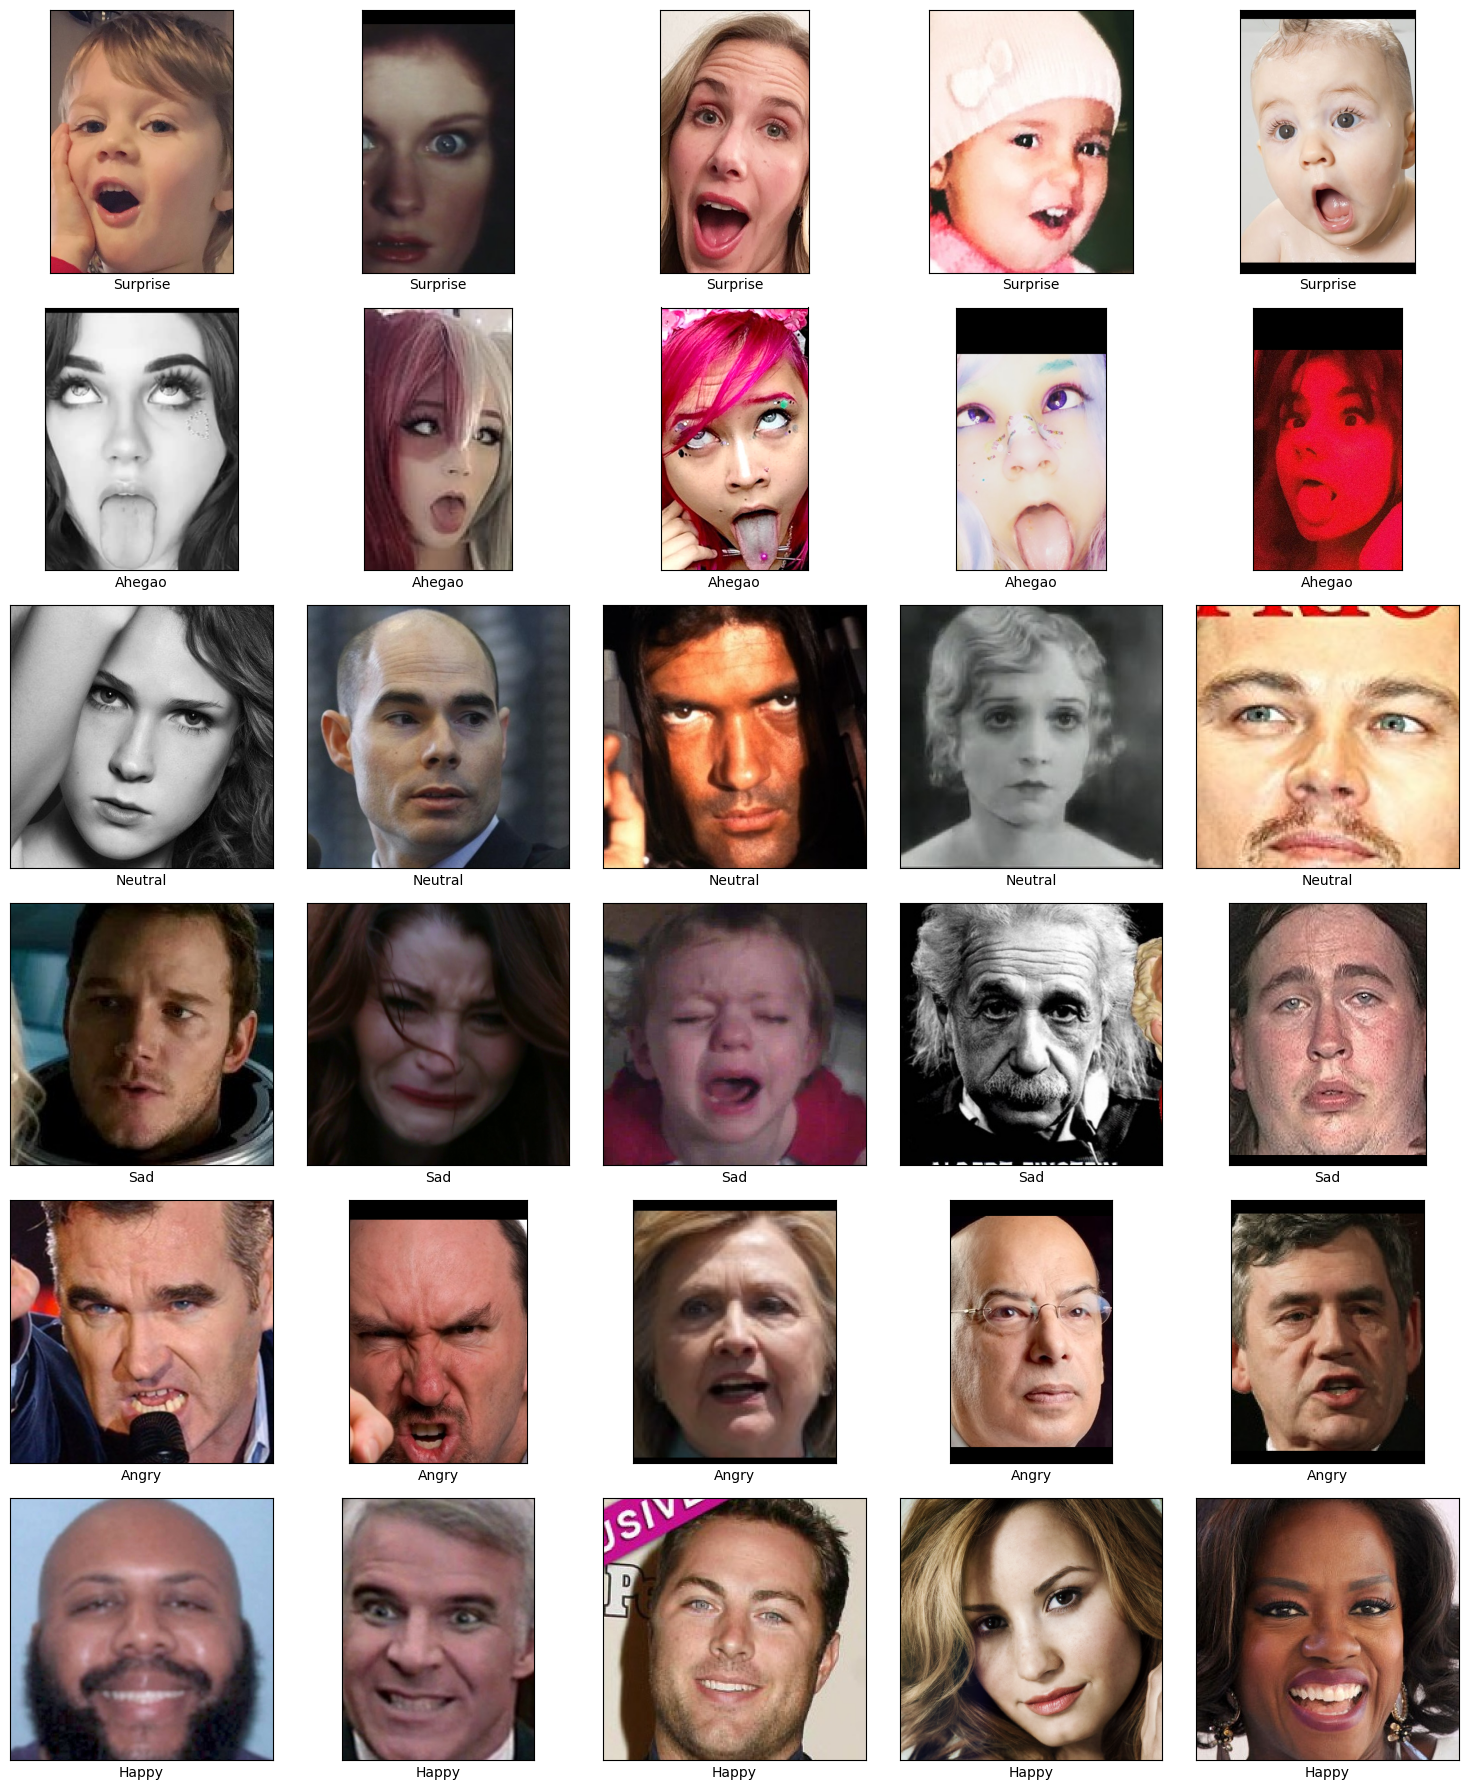

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
emotion_image = {}

# Tentukan path sumber train
path = "face_recognition/"
path_sub = os.path.join(path, "dataset")

# Baca semua file dalam folder setiap kelas
for class_name in os.listdir(path_sub):
    class_path = os.path.join(path_sub, class_name)
    if os.path.isdir(class_path):
        image_list = os.listdir(class_path)
        if len(image_list) >= 5:  # pastikan ada minimal 5 gambar
            emotion_image[class_name] = image_list

# Cek jika tidak ada kelas ditemukan
if len(emotion_image) == 0:
    raise ValueError("Tidak ditemukan kelas atau gambar di path: {}".format(path_sub))

# Plot gambar acak dari setiap kelas
fig, axs = plt.subplots(len(emotion_image), 5, figsize=(15, 3 * len(emotion_image)))

for i, (class_name, images) in enumerate(emotion_image.items()):
    selected_images = np.random.choice(images, 5, replace=False)

    for j, image_name in enumerate(selected_images):
        img_path = os.path.join(path_sub, class_name, image_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])

fig.tight_layout()
plt.show()


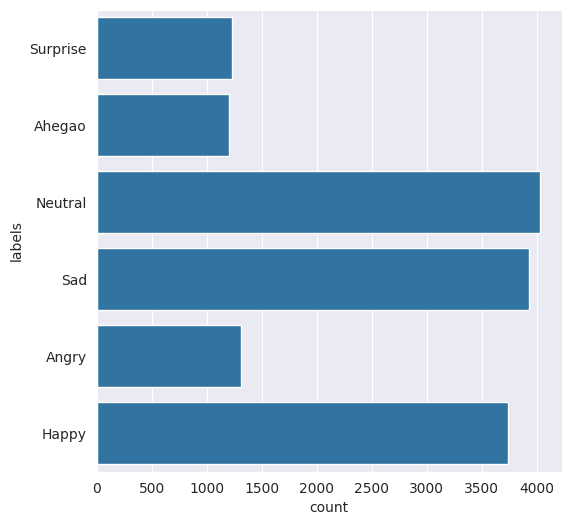

In [ ]:
#Sumber
emotion_path = 'face_recognition/dataset'

# Buat daftar yang menyimpan data untuk setiap nama file, path file, dan label dalam data
file_name = []
labels = []
full_path = []

# Dapatkan nama file gambar, path file, dan label satu per satu dengan looping, dan simpan sebagai dataframe
for path, subdirs, files in os.walk(emotion_path):
  for name in files:
    full_path.append(os.path.join(path, name))
    labels.append(path.split('/')[-1])
    file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, "labels":labels})

# Plot distribusi gambar di setiap kelas
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

In [ ]:
crop_path = 'face_recognition/dataset'

file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(crop_path):
  for name in files:
    full_path.append(os.path.join(path, name))
    labels.append(path.split('/')[-1])
    file_name.append(name)

df = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})

# Menghitung jumlah data gambar pada masing-masing label dan total data
label_counts = df.groupby(['labels']).size()
total_data = label_counts.sum()

print("Jumlah data per label:\n", label_counts)
print("\nTotal data:", total_data)

Jumlah data per label:
 labels
Ahegao      1205
Angry       1313
Happy       3740
Neutral     4027
Sad         3934
Surprise    1234
dtype: int64

Total data: 15453


# Data Augmentation

In [ ]:
import os
import cv2
import random
import numpy as np
from skimage import io
from tqdm import tqdm
from skimage.transform import rotate, warp, AffineTransform
from skimage.exposure import adjust_gamma

# Fungsi bantu untuk resize ke 256x256
def resize_to_256(img):
    return cv2.resize(img, (256, 256))

# Konversi hasil transformasi skimage ke uint8
def convert_to_uint8(img):
    img = np.clip(img, 0, 1)
    return (img * 255).astype(np.uint8)

# Rotasi berlawanan arah jarum jam
# def anticlockwise_rotation(img):
#     img = resize_to_256(img)
#     sudut = random.randint(0, 180)
#     return convert_to_uint8(rotate(img, sudut, mode='wrap'))

# # Rotasi searah jarum jam
# def clockwise_rotation(img):
#     img = resize_to_256(img)
#     sudut = random.randint(0, 180)
#     return convert_to_uint8(rotate(img, -sudut, mode='wrap'))

# # Flip atas bawah
# def flip_up_down(img):
#     img = resize_to_256(img)
#     return np.flipud(img)

# Tambah kecerahan
def add_brightness(img):
    img = resize_to_256(img)
    bright = adjust_gamma(img / 255.0, gamma=0.8, gain=1.2)
    return convert_to_uint8(bright)

# Blur
def blur_image(img):
    img = resize_to_256(img)
    return cv2.GaussianBlur(img, (5, 5), 0)

# Shearing
def sheared(img):
    img = resize_to_256(img)
    transform = AffineTransform(shear=0.2)
    warped = warp(img / 255.0, transform, mode="wrap")
    return convert_to_uint8(warped)

# Warp shift
def warp_shift(img):
    img = resize_to_256(img)
    transform = AffineTransform(translation=(0, 40))
    warped = warp(img / 255.0, transform, mode="wrap")
    return convert_to_uint8(warped)

In [ ]:
# --- Daftar transformasi ---
transformations = {
    # 'rotate anticlockwise' : anticlockwise_rotation,
    # 'rotate clockwise'     : clockwise_rotation,
    # 'flip up down'         : flip_up_down,
    'add brightness'       : add_brightness,
    'blurring image'       : blur_image,
    'sheared image'        : sheared,
    'warp shift'           : warp_shift
}

# --- Direktori dataset ---
dataset_dirs = [
    '/content/face_recognition/dataset/Ahegao',
    '/content/face_recognition/dataset/Angry',
    '/content/face_recognition/dataset/Surprise',
]

# --- Jumlah augmentasi per kelas ---
augment_counts = {
    '/content/face_recognition/dataset/Ahegao': 2500,
    '/content/face_recognition/dataset/Angry': 2500,
    '/content/face_recognition/dataset/Surprise': 2500,
}

# --- Proses augmentasi ---
for dataset_dir in dataset_dirs:
    images = [os.path.join(dataset_dir, im) for im in os.listdir(dataset_dir) if im.lower().endswith(('.jpg', '.jpeg', '.png'))]
    images_to_generate = augment_counts[dataset_dir]
    i = 1

    print(f"\nMengaugmentasi {images_to_generate} gambar untuk folder: {dataset_dir}")
    for _ in tqdm(range(images_to_generate), desc=f"Processing {os.path.basename(dataset_dir)}"):
        image = random.choice(images)
        try:
            original_image = io.imread(image)
            resized_image = resize_to_256(original_image)

            transformed_image = None
            n = 0
            transformation_count = random.randint(1, len(transformations))

            while n < transformation_count:
                key = random.choice(list(transformations))
                if transformed_image is None:
                    transformed_image = transformations[key](resized_image)
                else:
                    transformed_image = transformations[key](transformed_image)
                n += 1

            # Simpan hasil ke folder yang sama
            original_filename = os.path.splitext(os.path.basename(image))[0]
            new_image_path = os.path.join(dataset_dir, f"aug_{i}_{original_filename}.jpg")
            cv2.imwrite(new_image_path, transformed_image)
            i += 1

        except Exception as e:
            print(f"Gagal memproses {image} karena error: {e}")

print("\n Augmentasi gambar selesai dan disimpan di folder asal.")


Mengaugmentasi 2500 gambar untuk folder: /content/face_recognition/dataset/Ahegao


Processing Ahegao: 100%|██████████| 2500/2500 [00:51<00:00, 48.42it/s]



Mengaugmentasi 2500 gambar untuk folder: /content/face_recognition/dataset/Angry


Processing Angry: 100%|██████████| 2500/2500 [00:43<00:00, 57.44it/s]



Mengaugmentasi 2500 gambar untuk folder: /content/face_recognition/dataset/Surprise


Processing Surprise: 100%|██████████| 2500/2500 [00:47<00:00, 52.94it/s]


 Augmentasi gambar selesai dan disimpan di folder asal.


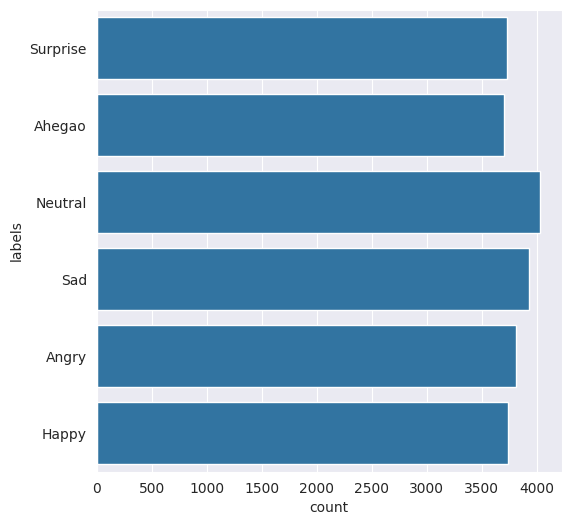

In [ ]:
#Sumber
crop_path = 'face_recognition/dataset'

# Buat daftar yang menyimpan data untuk setiap nama file, path file, dan label dalam data
file_name = []
labels = []
full_path = []

# Dapatkan nama file gambar, path file, dan label satu per satu dengan looping, dan simpan sebagai dataframe
for path, subdirs, files in os.walk(crop_path):
  for name in files:
    full_path.append(os.path.join(path, name))
    labels.append(path.split('/')[-1])
    file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, "labels":labels})

# Plot distribusi gambar di setiap kelas
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

In [ ]:
crop_path = 'face_recognition/dataset'

file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(crop_path):
  for name in files:
    full_path.append(os.path.join(path, name))
    labels.append(path.split('/')[-1])
    file_name.append(name)

df = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})

# Menghitung jumlah data gambar pada masing-masing label dan total data
label_counts = df.groupby(['labels']).size()
total_data = label_counts.sum()

print("Jumlah data per label:\n", label_counts)
print("\nTotal data:", total_data)

Jumlah data per label:
 labels
Ahegao      3705
Angry       3813
Happy       3740
Neutral     4027
Sad         3934
Surprise    3734
dtype: int64

Total data: 22953


# Data Splitting

In [ ]:
# Variabel yang digunakan pada pemisahan data ini di mana variabel x = data path dan y = data labels

X= df['path']
y= df['labels']

# Split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Menyatukan dataframe
df_tr = pd.DataFrame({'path':X_train, 'labels':y_train, 'set':'train'})
df_te = pd.DataFrame({'path':X_test, 'labels':y_test, 'set':'test'})

In [ ]:
#Gabungkan DataFrame
df_all = pd.concat([df_tr,df_te], ignore_index=True)

In [ ]:
df_all.head()

path    labels    set
0  face_recognition/dataset/Happy/0a3385ffb649909...     Happy  train
1  face_recognition/dataset/Neutral/0caf401ef437a...   Neutral  train
2  face_recognition/dataset/Surprise/cropped_emot...  Surprise  train
3  face_recognition/dataset/Happy/0b000e87ecb2064...     Happy  train
4  face_recognition/dataset/Neutral/0b8156a6890aa...   Neutral  train

In [ ]:
print(df_all.groupby(['set','labels']).size(), '\n')

# Calculate and print the overall total
total_data_overall = df_all.shape[0]
print("Total data keseluruhan:", total_data_overall)

# Calculate and print the total data points per set
total_data_per_set = df_all.groupby('set').size()
print("\nTotal data per set:\n", total_data_per_set)

set    labels  
test   Ahegao       754
       Angry        732
       Happy        775
       Neutral      794
       Sad          788
       Surprise     748
train  Ahegao      2951
       Angry       3081
       Happy       2965
       Neutral     3233
       Sad         3146
       Surprise    2986
dtype: int64 

Total data keseluruhan: 22953

Total data per set:
 set
test      4591
train    18362
dtype: int64


In [ ]:
# Memanggil dataset asli yang berisi keseluruhan data gambar yang sesuai dengan labelnya
datasource_path = "face_recognition/dataset/"
# Membuat variabel Dataset, tempat menampung data yang telah dilakukan pembagian data training dan testing
dataset_path = "Dataset_Final/"

In [ ]:
for index, row in tq(df_all.iterrows()):
    # Deteksi filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['labels'],row['image'].split('.')[0])

    # Buat direktori tujuan folder
    if os.path.exists(os.path.join(dataset_path,row['set'],row['labels'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['labels']))

    # Tentukan tujuan file
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['labels'],destination_file_name)

    # Salin file dari sumber ke tujuan
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

# Image Data Generator

In [ ]:
import os

# Direktori dataset
TRAIN_DIR = "Dataset_Final/train/"
TEST_DIR = "Dataset_Final/test/"

# Mendapatkan semua kelas (folder) dalam train dan test
train_classes = [folder for folder in os.listdir(TRAIN_DIR) if os.path.isdir(os.path.join(TRAIN_DIR, folder))]
test_classes = [folder for folder in os.listdir(TEST_DIR) if os.path.isdir(os.path.join(TEST_DIR, folder))]

# Menampilkan jumlah gambar per kelas untuk training
print("=== TRAINING DATA ===")
for class_name in train_classes:
    class_path = os.path.join(TRAIN_DIR, class_name)
    total_images = len(os.listdir(class_path))
    print(f"Total images in training class '{class_name}': {total_images}")

# Menampilkan jumlah gambar per kelas untuk testing
print("\n=== TESTING DATA ===")
for class_name in test_classes:
    class_path = os.path.join(TEST_DIR, class_name)
    total_images = len(os.listdir(class_path))
    print(f"Total images in testing class '{class_name}': {total_images}")


=== TRAINING DATA ===
Total images in training class 'Surprise': 2986
Total images in training class 'Ahegao': 2951
Total images in training class 'Neutral': 3233
Total images in training class 'Sad': 3146
Total images in training class 'Angry': 3081
Total images in training class 'Happy': 2965

=== TESTING DATA ===
Total images in testing class 'Surprise': 748
Total images in testing class 'Ahegao': 754
Total images in testing class 'Neutral': 794
Total images in testing class 'Sad': 788
Total images in testing class 'Angry': 732
Total images in testing class 'Happy': 775


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Buat objek ImageDataGenerator yang menormalkan gambar
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=0.1,
    shear_range=0.05,
    brightness_range=(0.8, 1.2),
    horizontal_flip=False,  # Bisa True jika ekspresi simetris
)


# Generator untuk data training
train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size=64,
    target_size=(224, 224),
    color_mode="rgb",               # RGB karena dataset kamu RGB
    class_mode='categorical',       # Categorical karena 6 kelas
    subset='training',
    shuffle=True
)

# # Generator untuk data validasi
# validation_generator = datagen.flow_from_directory(
#     TRAIN_DIR,
#     batch_size=32,
#     target_size=(150, 150),
#     color_mode="rgb",
#     class_mode='categorical',
#     subset='validation',
#     shuffle=False
# )

# Generator untuk data testing
test_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size=64,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 14691 images belonging to 6 classes.
Found 3671 images belonging to 6 classes.


In [ ]:
# # Buat objek ImageDataGenerator yang menormalkan gambar
# datagen = ImageDataGenerator(rescale=1/255.,
#                              validation_split = 0.2)
# test_datagen = ImageDataGenerator(rescale=1. / 255)

# train_generator = datagen.flow_from_directory(TRAIN_DIR,
#                                               batch_size=32,
#                                               target_size=(150,150),
#                                               color_mode="grayscale",
#                                               class_mode='binary',
#                                               subset='training',
#                                               shuffle=True)


# test_generator = test_datagen.flow_from_directory(TEST_DIR,
#                                                   batch_size=1,
#                                                   target_size=(150,150),
#                                                   color_mode="grayscale",
#                                                   class_mode='binary',
#                                                   shuffle=False)

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(rescale=1./255.)

# # Training generator
# train_generator = datagen.flow_from_directory(
#     TRAIN_DIR,
#     target_size=(224, 224),
#     batch_size=64,
#     class_mode='categorical',
#     color_mode='rgb',
#     shuffle=True
# )

# # Testing / validation generator
# test_generator = datagen.flow_from_directory(
#     TEST_DIR,
#     target_size=(224, 224),
#     batch_size=64,
#     class_mode='categorical',
#     color_mode='rgb',
#     shuffle=False
# )


In [ ]:
print("Label klasifikasi:", train_generator.class_indices)
print("Jumlah kelas:", len(train_generator.class_indices))

Label klasifikasi: {'Ahegao': 0, 'Angry': 1, 'Happy': 2, 'Neutral': 3, 'Sad': 4, 'Surprise': 5}
Jumlah kelas: 6


# Pembangunan Model

In [ ]:
num_classes = len(train_generator.class_indices)
print("Jumlah kelas:", num_classes)

Jumlah kelas: 6


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


# Load VGG16 sebagai base model (tanpa top)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True  # unfreeze semua layer

# Bangun model Sequential
model = Sequential()

# Tambahkan base model (pre-trained VGG16)
model.add(base_model)

# Tambahkan custom head
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(num_classes, activation='softmax'))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,113,286 (57.65 MB)

 Trainable params: 15,111,750 (57.65 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [ ]:
# 3. Compile Model
optimizer = Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# --- CALLBACKS ---
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

checkpoint = ModelCheckpoint('face_recognition.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.3,
                              patience=5,
                              verbose=1,
                              min_lr=1e-6)

# --- TRAINING ---
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3268 - loss: 10.5371
Epoch 1: val_accuracy improved from -inf to 0.52356, saving model to face_recognition.h5


230/230 ━━━━━━━━━━━━━━━━━━━━ 494s 2s/step - accuracy: 0.3271 - loss: 10.5354 - val_accuracy: 0.5236 - val_loss: 9.5288 - learning_rate: 1.0000e-05
Epoch 2/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5692 - loss: 9.3808
Epoch 2: val_accuracy improved from 0.52356 to 0.66521, saving model to face_recognition.h5


230/230 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.5693 - loss: 9.3803 - val_accuracy: 0.6652 - val_loss: 8.8580 - learning_rate: 1.0000e-05
Epoch 3/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6529 - loss: 8.8481
Epoch 3: val_accuracy improved from 0.66521 to 0.74121, saving model to face_recognition.h5


230/230 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.6529 - loss: 8.8476 - val_accuracy: 0.7412 - val_loss: 8.3525 - learning_rate: 1.0000e-05
Epoch 4/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7073 - loss: 8.4272
Epoch 4: val_accuracy did not improve from 0.74121
230/230 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.7073 - loss: 8.4269 - val_accuracy: 0.7080 - val_loss: 8.2835 - learning_rate: 1.0000e-05
Epoch 5/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7474 - loss: 8.0723
Epoch 5: val_accuracy improved from 0.74121 to 0.78317, saving model to face_recognition.h5


230/230 ━━━━━━━━━━━━━━━━━━━━ 360s 2s/step - accuracy: 0.7474 - loss: 8.0719 - val_accuracy: 0.7832 - val_loss: 7.7547 - learning_rate: 1.0000e-05
Epoch 6/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7841 - loss: 7.7214
Epoch 6: val_accuracy improved from 0.78317 to 0.78480, saving model to face_recognition.h5


230/230 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.7841 - loss: 7.7211 - val_accuracy: 0.7848 - val_loss: 7.5525 - learning_rate: 1.0000e-05
Epoch 7/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8088 - loss: 7.4126
Epoch 7: val_accuracy improved from 0.78480 to 0.80523, saving model to face_recognition.h5


230/230 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.8088 - loss: 7.4125 - val_accuracy: 0.8052 - val_loss: 7.2284 - learning_rate: 1.0000e-05
Epoch 8/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8185 - loss: 7.1423
Epoch 8: val_accuracy improved from 0.80523 to 0.81803, saving model to face_recognition.h5


230/230 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.8185 - loss: 7.1421 - val_accuracy: 0.8180 - val_loss: 7.0087 - learning_rate: 1.0000e-05
Epoch 9/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8403 - loss: 6.8629
Epoch 9: val_accuracy improved from 0.81803 to 0.82702, saving model to face_recognition.h5


230/230 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.8403 - loss: 6.8626 - val_accuracy: 0.8270 - val_loss: 6.7271 - learning_rate: 1.0000e-05
Epoch 10/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8554 - loss: 6.5976
Epoch 10: val_accuracy did not improve from 0.82702
230/230 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.8554 - loss: 6.5974 - val_accuracy: 0.8134 - val_loss: 6.5384 - learning_rate: 1.0000e-05
Epoch 11/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8691 - loss: 6.3543
Epoch 11: val_accuracy improved from 0.82702 to 0.84228, saving model to face_recognition.h5


230/230 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.8691 - loss: 6.3541 - val_accuracy: 0.8423 - val_loss: 6.2617 - learning_rate: 1.0000e-05
Epoch 12/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8758 - loss: 6.1273
Epoch 12: val_accuracy improved from 0.84228 to 0.85127, saving model to face_recognition.h5


230/230 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.8758 - loss: 6.1271 - val_accuracy: 0.8513 - val_loss: 6.0253 - learning_rate: 1.0000e-05
Epoch 13/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8909 - loss: 5.8832
Epoch 13: val_accuracy improved from 0.85127 to 0.85263, saving model to face_recognition.h5


230/230 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.8909 - loss: 5.8830 - val_accuracy: 0.8526 - val_loss: 5.8496 - learning_rate: 1.0000e-05
Epoch 14/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9021 - loss: 5.6577
Epoch 14: val_accuracy improved from 0.85263 to 0.85372, saving model to face_recognition.h5


230/230 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.9021 - loss: 5.6575 - val_accuracy: 0.8537 - val_loss: 5.6860 - learning_rate: 1.0000e-05
Epoch 15/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9080 - loss: 5.4416
Epoch 15: val_accuracy did not improve from 0.85372
230/230 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.9080 - loss: 5.4414 - val_accuracy: 0.8425 - val_loss: 5.5159 - learning_rate: 1.0000e-05
Epoch 16/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9132 - loss: 5.2500
Epoch 16: val_accuracy did not improve from 0.85372
230/230 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.9132 - loss: 5.2497 - val_accuracy: 0.8445 - val_loss: 5.3268 - learning_rate: 1.0000e-05
Epoch 17/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9342 - loss: 5.0152
Epoch 17: val_accuracy improved from 0.85372 to 0.86816, saving model to face_recognition.h5


230/230 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.9342 - loss: 5.0151 - val_accuracy: 0.8682 - val_loss: 5.0742 - learning_rate: 1.0000e-05
Epoch 18/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9401 - loss: 4.8156
Epoch 18: val_accuracy did not improve from 0.86816
230/230 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.9401 - loss: 4.8154 - val_accuracy: 0.8665 - val_loss: 4.9155 - learning_rate: 1.0000e-05
Epoch 19/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9431 - loss: 4.6409
Epoch 19: val_accuracy did not improve from 0.86816
230/230 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.9431 - loss: 4.6406 - val_accuracy: 0.7889 - val_loss: 5.1241 - learning_rate: 1.0000e-05
Epoch 20/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9517 - loss: 4.4507
Epoch 20: val_accuracy improved from 0.86816 to 0.87769, saving model to face_recognition.h5


230/230 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.9517 - loss: 4.4505 - val_accuracy: 0.8777 - val_loss: 4.5845 - learning_rate: 1.0000e-05
Epoch 21/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9588 - loss: 4.2677
Epoch 21: val_accuracy did not improve from 0.87769
230/230 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.9588 - loss: 4.2675 - val_accuracy: 0.8671 - val_loss: 4.4552 - learning_rate: 1.0000e-05
Epoch 22/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9662 - loss: 4.0934
Epoch 22: val_accuracy did not improve from 0.87769
230/230 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.9662 - loss: 4.0932 - val_accuracy: 0.8698 - val_loss: 4.3253 - learning_rate: 1.0000e-05
Epoch 23/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9705 - loss: 3.9219
Epoch 23: val_accuracy did not improve from 0.87769
230/230 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.9705 - loss: 3.9218 - val_accuracy: 0.8744 - val_loss: 4.1480 - learning_rate: 1.0000e-05
Ep

230/230 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.9791 - loss: 3.3242 - val_accuracy: 0.8826 - val_loss: 3.5643 - learning_rate: 1.0000e-05
Epoch 28/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9832 - loss: 3.1824
Epoch 28: val_accuracy did not improve from 0.88259
230/230 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.9832 - loss: 3.1823 - val_accuracy: 0.8562 - val_loss: 3.6795 - learning_rate: 1.0000e-05
Epoch 29/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9853 - loss: 3.0450
Epoch 29: val_accuracy did not improve from 0.88259
230/230 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.9852 - loss: 3.0449 - val_accuracy: 0.8769 - val_loss: 3.3530 - learning_rate: 1.0000e-05
Epoch 30/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9858 - loss: 2.9190
Epoch 30: val_accuracy did not improve from 0.88259
230/230 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.9858 - loss: 2.9189 - val_accuracy: 0.8548 - val_loss: 3.4252 - learning_rate: 1.0000e-05
Re

# Evaluasi Model

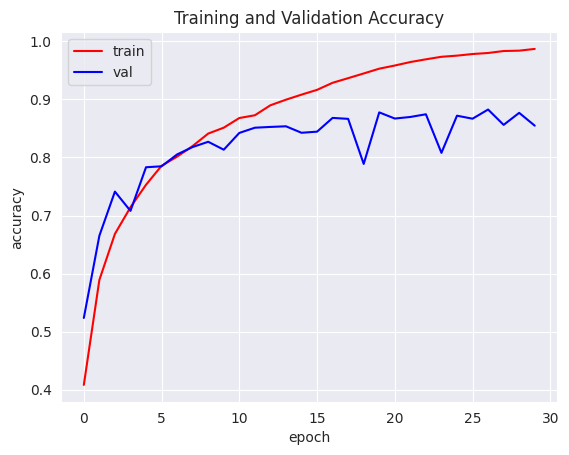

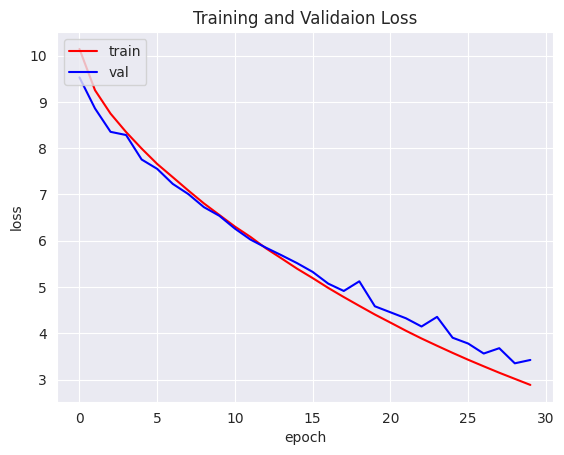

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

58/58 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step
Confusion Matrix:
 [[578   4   0   1   0   7]
 [  0 558   6  18  23  11]
 [  0   4 568  10   9   2]
 [  0  13  23 504 102   4]
 [  0  16  14 124 473   2]
 [  1   6   3  17   2 568]]

Classification Report:
               precision    recall  f1-score   support

      Ahegao       1.00      0.98      0.99       590
       Angry       0.93      0.91      0.92       616
       Happy       0.93      0.96      0.94       593
     Neutral       0.75      0.78      0.76       646
         Sad       0.78      0.75      0.76       629
    Surprise       0.96      0.95      0.95       597

    accuracy                           0.89      3671
   macro avg       0.89      0.89      0.89      3671
weighted avg       0.89      0.89      0.89      3671


Test Accuracy: 0.881503701210022


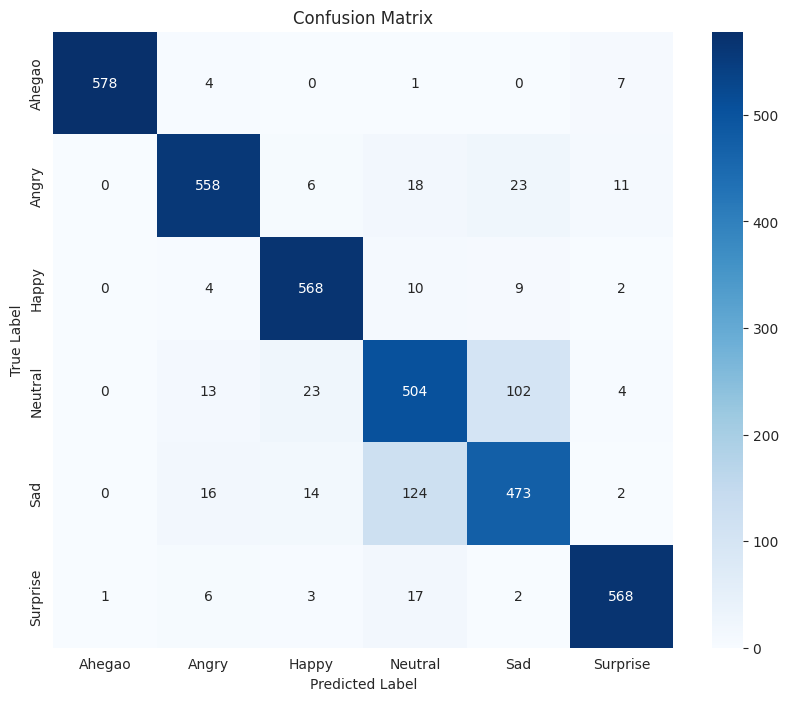

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Muat model terbaik yang disimpan oleh ModelCheckpoint
model.load_weights('face_recognition.h5')

# Prediksi pada data test menggunakan model terbaik
y_pred_test = model.predict(test_generator)
y_pred_test = np.argmax(y_pred_test, axis=1)
y_true_test = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true_test, y_pred_test)

# Classification Report
report = classification_report(y_true_test, y_pred_test, target_names=test_generator.class_indices)

# Akurasi Test
test_accuracy = model.evaluate(test_generator, verbose=0)[1]

# Menampilkan hasil
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)
print("\nTest Accuracy:", test_accuracy)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Saved Model

In [ ]:
from google.colab import drive
import os
import tensorflow as tf

# Opsional: hanya import jika memang ingin ekspor ke TFJS
try:
    import tensorflowjs as tfjs
except:
    !pip install tensorflowjs
    import tensorflowjs as tfjs

# ========== 1. Mount Google Drive ==========
drive.mount('/content/drive')

# ========== 2. Buat Folder Tujuan ==========
base_dir = "/content/drive/MyDrive/Laskar AI/Project Klasifikasi Gambar"
os.makedirs(base_dir, exist_ok=True)

# ========== 3. Simpan Model ke SavedModel ==========
savedmodel_path = os.path.join(base_dir, "face_recognition_model.keras")

# Pastikan 'model' sudah terdefinisi sebelumnya (misal hasil dari model training)
try:
    model.save(savedmodel_path)
    print(f"✅ SavedModel berhasil disimpan ke:\n{savedmodel_path}")
except NameError:
    print("❌ Model belum terdefinisi. Pastikan kamu telah melatih atau memuat model sebelumnya!")

# ========== 4. Konversi ke TensorFlow Lite ==========
tflite_dir = os.path.join(base_dir, "tflite")
os.makedirs(tflite_dir, exist_ok=True)

try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()

    with open(os.path.join(tflite_dir, "model.tflite"), "wb") as f:
        f.write(tflite_model)

    # Simpan label.txt (ganti sesuai labelmu)
    labels = ["Ahegao", "Angry", "Happy", "Neutral", "Sad", "Surprise"]
    with open(os.path.join(tflite_dir, "label.txt"), "w") as f:
        f.write("\n".join(labels))

    print(f"✅ TFLite model dan label.txt disimpan di:\n{tflite_dir}")

except Exception as e:
    print("❌ Gagal konversi ke TFLite:", e)

# ========== 5. Simpan ke TensorFlow.js ==========
tfjs_path = os.path.join(base_dir, "tfjs_model")
try:
    tfjs.converters.save_keras_model(model, tfjs_path)
    print(f"✅ Model TensorFlow.js disimpan di:\n{tfjs_path}")
except Exception as e:
    print("❌ Gagal simpan model ke TensorFlow.js:", e)

# ========== 6. Simpan README.md ==========
readme_content = """# 🧠 Image Classification Model Submission

## 📌 Project Overview
This project is a deep learning-based image classification model that classifies facial expressions into six classes:
- Ahegao
- Angry
- Happy
- Neutral
- Sad
- Surprise

The model was built using TensorFlow/Keras and trained on a labeled image dataset. After training, the model was exported into three formats:
- `SavedModel` (for backend/server deployment)
- `TensorFlow Lite` (for mobile/embedded systems)
- `TensorFlow.js` (for web browser deployment)

---

## 🧠 Model Information
- **Model Type**: Convolutional Neural Network (CNN)
- **Framework**: TensorFlow / Keras
- **Input Size**: 256x256 RGB images
- **Output**: Softmax probability over 6 classes
"""

readme_path = os.path.join(base_dir, "README.md")
with open(readme_path, "w") as f:
    f.write(readme_content)

print(f"✅ README.md berhasil disimpan di:\n{readme_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ SavedModel berhasil disimpan ke:
/content/drive/MyDrive/Laskar AI/Project Klasifikasi Gambar/face_recognition_model.keras
Saved artifact at '/tmp/tmp5g2nbpim'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_19')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  137197046632464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137197046632656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137197046633808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137197046632272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137197046635728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137197046633232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137197046631888: TensorSpec(shape=(), 

✅ TFLite model dan label.txt disimpan di:
/content/drive/MyDrive/Laskar AI/Project Klasifikasi Gambar/tflite
failed to lookup keras version from the file,
    this is likely a weight only file
✅ Model TensorFlow.js disimpan di:
/content/drive/MyDrive/Laskar AI/Project Klasifikasi Gambar/tfjs_model
✅ README.md berhasil disimpan di:
/content/drive/MyDrive/Laskar AI/Project Klasifikasi Gambar/README.md


In [ ]:
pip freeze > "/content/drive/MyDrive/Laskar AI/Project Klasifikasi Gambar/requirements.txt"

# Inference

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load model
# model = load_model('face_recognition_model.keras')
model = load_model('/content/drive/MyDrive/Laskar AI/Project Klasifikasi Gambar/face_recognition_model.keras')


# Path ke direktori test
test_dir = 'Dataset_Final/test/'

# Dapatkan nama kelas
class_names = sorted(os.listdir(test_dir))

# Loop melalui setiap kelas
for class_name in class_names:
    # Path ke direktori kelas
    class_dir = os.path.join(test_dir, class_name)

    # Ambil satu gambar dari kelas
    image_path = os.path.join(class_dir, os.listdir(class_dir)[0])

    # Load dan preprocess gambar
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    # Prediksi
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_index]

    # Print hasil
    print(f"Gambar: {image_path}")
    print(f"Kelas sebenarnya: {class_name}")
    print(f"Kelas prediksi: {predicted_class_name}")
    print("-" * 30)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 38 variables whereas the saved optimizer has 74 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Gambar: Dataset_Final/test/Ahegao/aug_116_lol252~ahegao.jpg
Kelas sebenarnya: Ahegao
Kelas prediksi: Ahegao
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Gambar: Dataset_Final/test/Angry/aug_1905_cropped_emotions.505942~angry.jpg
Kelas sebenarnya: Angry
Kelas prediksi: Angry
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Gambar: Dataset_Final/test/Happy/cropped_emotions.272049.png
Kelas sebenarnya: Happy
Kelas prediksi: Happy
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Gambar: Dataset_Final/test/Neutral/000f61f64cd9bb364df45a47e896fe86a1267ecbc3d5c973d4f88cc6f.jpg
Kelas sebenarnya: Neutral
Kelas prediksi: Neutral
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Gambar: Dataset_Final/test/Sad/7a88dcbb051150edd600a3b2e4cb4341ff8f322e4d8c0b369c9ffa05.jpg
Kelas sebenarnya: Sad
Kelas prediksi: Angry
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step